# Extracting information from dataset


This notebook presents a case study to retrieve information from MazurkaBL dataset, provide tools to visualise it and imports models for dataset analysis.

## Import libraries

In [1]:
import numpy as np
import glob
import matplotlib.pyplot as plt
%matplotlib inline
import mpld3
mpld3.enable_notebook()
import pandas as bd
import IPython.display as ipd
import librosa
from data_processing import prepare_dataset, plot_beat_dyn, plot_dyn_with_markings_values_boxplots

## Retrieve MazurkaBL dataset

The MazurkaBL dataset was created from 2000 selected recordings from the CHARM Mazurka dataset. It contains score-aligned loudness, beat, and expressive marking data for analysing expressive variations of Chopin Mazurkas. It covers a total of forty-four different Chopin Mazurkas with an average of 45 different professional interpretations.

The files that are loaded below include for each recording: time in seconds for each score beat, dynamic value for each score beat, expressive markings and their locations in score beat, and markings related to change in dynamics and their locations in score beat.

In [2]:
files_beat = glob.glob('../beat_time/*.csv')
files_dyn = glob.glob('../beat_dyn/*.csv')
files_mark = glob.glob('../markings/*.csv')
files_mark_dyn = glob.glob('../markings_dyn/*.csv')

Mazurka_info = prepare_dataset(files_beat, files_dyn, files_mark, files_mark_dyn)

Retrieving information from the .csv files...
Done!


In [3]:
# Print out stuff

pianist_ID = Mazurka_info['M24-2'][3].id
pianist_timing = Mazurka_info['M24-2'][3].beat
pianist_dynamics = Mazurka_info['M24-2'][3].dyn
# pianist_sones = Mazurka_info['M06-3'][3].sones

### Plotting timing and dynamics variations 

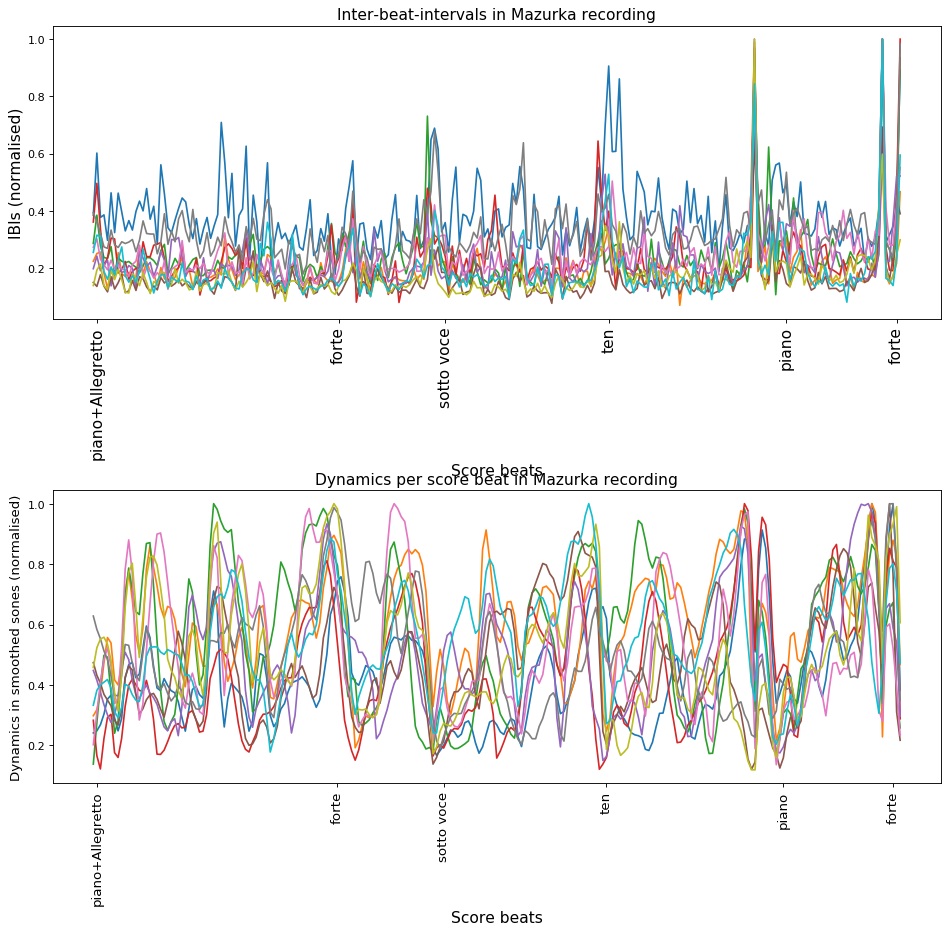

In [4]:
plot_beat_dyn(Mazurka_info['M63-3'][:10])

### Comparing the dynamic values at the positions of dynamic markings

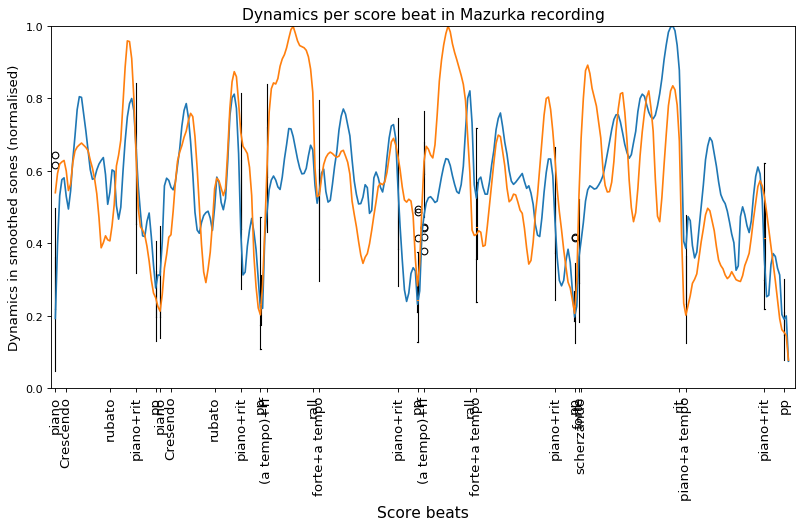

In [6]:
plot_dyn_with_markings_values_boxplots(Mazurka_info['M06-1'], 1, 3)

Example: compare two interpretations of the same score excerpt, one played by Rubinstein and the other played by Magallof:

In [15]:
x, sr1 = librosa.load('../media/dynamics_demo1_rubinstein-2896.wav')
ipd.Audio(x, rate=sr1)


In [16]:
y, sr2 = librosa.load('../media/dynamics_demo2_magallof-2914.wav')
ipd.Audio(y, rate=sr2)